In [1]:
n = 6
m = 10
k = 3 # 3-SAT
ret_num = 3

In [2]:
from benchmark.weighted_problem import WeightedProblem
problem = WeightedProblem(n, m, k)

In [3]:
for (c, w) in problem.formula.weighted_clauses:
    print(f'Clause: {c}, weight: {w}')

Clause: (¬x4 ∨ ¬x3 ∨ x4), weight: 9.825111905278265
Clause: (x3 ∨ ¬x1 ∨ x5), weight: 4.866158287215333
Clause: (¬x5 ∨ ¬x0 ∨ x1), weight: 8.858819625884172
Clause: (x0 ∨ ¬x2 ∨ x2), weight: 5.586899877258631
Clause: (¬x2 ∨ x2 ∨ x1), weight: 9.386891600459947
Clause: (x2 ∨ ¬x1 ∨ ¬x3), weight: 1.2480139737974039
Clause: (x0 ∨ ¬x4 ∨ x3), weight: 0.044252324978549806
Clause: (x4 ∨ x0 ∨ ¬x4), weight: 1.9701577247503954
Clause: (x5 ∨ ¬x5 ∨ ¬x1), weight: 9.751056015613642
Clause: (¬x5 ∨ ¬x2 ∨ ¬x1), weight: 0.29466944152906294


In [4]:
from max_3_sat.quantum_solver import QuantumSolver

quantum_solver = QuantumSolver(problem.formula)
q_max_sats = quantum_solver.max_sat(ret_num=ret_num)


In [5]:
q_max_sats

{'001100': 51.83203077676541,
 '010101': 50.584016802967994,
 '001110': 51.83203077676541}

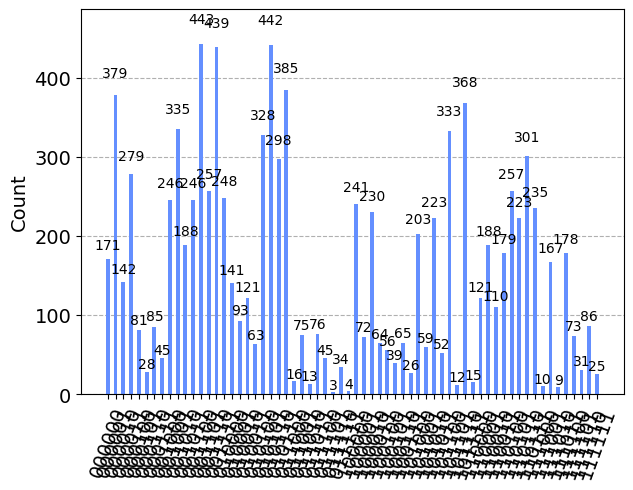

In [6]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

plot_histogram(quantum_solver.circuit_result)

In [7]:
from max_3_sat.classical_solver import ClassicalSolver

classical_solver = ClassicalSolver()
c_max_sats = classical_solver.max_sat(problem.formula.to_pysat(), weight_func = problem.formula.assignment_weight, ret_num=ret_num)


In [8]:
c_max_sats

{'000000': 51.83203077676541,
 '001000': 51.83203077676541,
 '001100': 51.83203077676541}

In [12]:
ratio = list(q_max_sats.values())[0] / list(c_max_sats.values())[0]
ratio

1.0

[]

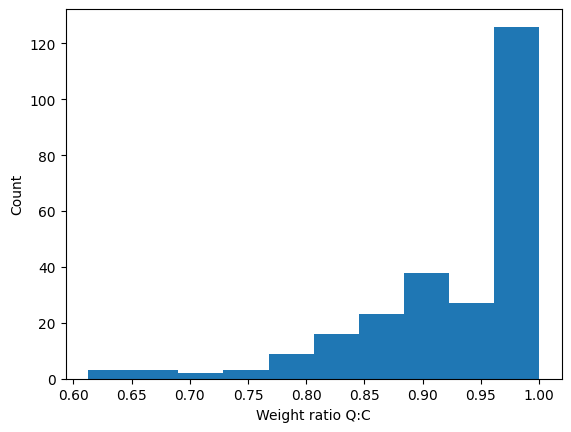

In [30]:
num_variables = 7
num_clauses = 10
vars_per_clause = 3

ratios = []

for _ in range(250):
    # Randomly generated problem instance
    problem = WeightedProblem(num_variables, num_clauses, vars_per_clause)

    # Find max assignments with quantum solver
    quantum_solver = QuantumSolver()
    q_max_sats = quantum_solver.max_sat(problem.formula, ret_num=1)

    # Find max assignments with clasical solver
    classical_solver = ClassicalSolver()
    c_max_sats = classical_solver.max_sat(problem.formula.to_pysat(),   
    weight_func=problem.formula.assignment_weight, ret_num=1)

    # Calculate ratio between solutions
    ratios.append(problem.approximation_ratio(q_max_sats, c_max_sats))

# Plot
plt.hist(ratios)
plt.xlabel("Weight ratio Q:C")
plt.ylabel("Count")
plt.plot()


In [ ]:
vars_per_clause = 3

# Benchmark over 3 to 10 variable instances
for n in range(3, 10):
    # Benchmark over 10 to 20 clause instances
    for m in range(10, 20):
        # Generate 5 random instances
        for i in range(5):
            